# Imports

In [33]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import joblib

import matplotlib.pyplot as plt
import seaborn as sns

import os

# Filtrage

In [34]:
import pandas as pd

df_bdx = pd.read_csv("data/bordeaux_2022.csv")
df_appart_bdx = df_bdx[df_bdx["Type local"] == "Appartement"].copy()
df_maison_bdx = df_bdx[df_bdx["Type local"] == "Maison"].copy()

print(f"📊 Appartements Bordeaux : {len(df_appart_bdx)}")
print(f"📊 Maisons Bordeaux : {len(df_maison_bdx)}")


📊 Appartements Bordeaux : 5353
📊 Maisons Bordeaux : 1471


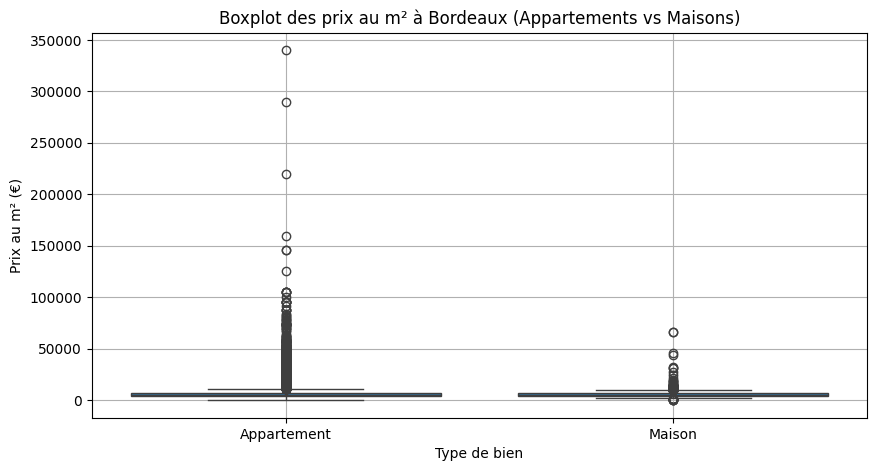

In [35]:
df_bdx_plot = pd.concat([df_appart_bdx, df_maison_bdx]).copy()
df_bdx_plot["prix_m2"] = df_bdx_plot["Valeur fonciere"] / df_bdx_plot["Surface reelle bati"]

# Suppression des lignes aberrantes (prix_m2 <= 0)
df_bdx_plot = df_bdx_plot[df_bdx_plot["prix_m2"] > 0]

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_bdx_plot, x="Type local", y="prix_m2")
plt.title("Boxplot des prix au m² à Bordeaux (Appartements vs Maisons)")
plt.ylabel("Prix au m² (€)")
plt.xlabel("Type de bien")
plt.grid(True)
plt.show()


In [36]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Application
df_appart_bdx = remove_outliers_iqr(df_appart_bdx, "prix_m2")
df_maison_bdx = remove_outliers_iqr(df_maison_bdx, "prix_m2")


In [37]:
# ✨ Colonnes utiles
colonnes_utiles = [
    "Surface reelle bati",
    "Surface terrain",
    "Nombre de lots",
    "prix_m2",
    "Type local",
    "Commune"
]

# 📦 Nettoyage pour Appartements et Maisons
df_appart_bdx = df_appart_bdx[colonnes_utiles].copy()
df_maison_bdx = df_maison_bdx[colonnes_utiles].copy()

# 🧹 Suppression des lignes avec NaN dans les features
features = ["Surface reelle bati", "Surface terrain", "Nombre de lots"]
df_appart_bdx_clean = df_appart_bdx.dropna(subset=features)
df_maison_bdx_clean = df_maison_bdx.dropna(subset=features)

print("✅ Données nettoyées et colonnes inutiles supprimées.")


✅ Données nettoyées et colonnes inutiles supprimées.


# Chargement modèle

In [38]:
model_appart = joblib.load("models/model_lille_appartement.pkl")
model_maison = joblib.load("models/model_lille_maison.pkl")


# Application

In [39]:


# Sélection des features
features = ["Surface reelle bati", "Surface terrain", "Nombre de lots"]

# 1. Préparation des données sans NaN
df_appart_bdx_clean = df_appart_bdx.dropna(subset=features)
df_maison_bdx_clean = df_maison_bdx.dropna(subset=features)

# 2. Séparation X / y
X_app = df_appart_bdx_clean[features]
y_app = df_appart_bdx_clean["prix_m2"]

X_mai = df_maison_bdx_clean[features]
y_mai = df_maison_bdx_clean["prix_m2"]

# 3. Prédictions
y_app_pred = model_appart.predict(X_app)
y_mai_pred = model_maison.predict(X_mai)

# 4. Évaluation
r2_app = r2_score(y_app, y_app_pred)
r2_mai = r2_score(y_mai, y_mai_pred)

print(f"🏙️  R² Appartements à Bordeaux : {r2_app:.3f}")
print(f"🏠  R² Maisons à Bordeaux      : {r2_mai:.3f}")


🏙️  R² Appartements à Bordeaux : -7.960
🏠  R² Maisons à Bordeaux      : -3.174


In [42]:
# Afficher les 5 premières lignes des données nettoyées pour Bordeaux

print("📋 Appartements Bordeaux (après nettoyage)")
display(df_appart_bdx_clean.count())

print("\n📋 Maisons Bordeaux (après nettoyage)")
display(df_maison_bdx_clean.count())


📋 Appartements Bordeaux (après nettoyage)


Surface reelle bati    235
Surface terrain        235
Nombre de lots         235
prix_m2                235
Type local             235
Commune                235
dtype: int64


📋 Maisons Bordeaux (après nettoyage)


Surface reelle bati    1291
Surface terrain        1291
Nombre de lots         1291
prix_m2                1291
Type local             1291
Commune                1291
dtype: int64